<a href="https://colab.research.google.com/github/tintenderete/TFM-Algoritmo-con-redes-evolutivas/blob/main/EVO/evo_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from evo import *
#from keras_plots import *
import matplotlib.pyplot as plt

# ejemplo sencillo  base

In [2]:
population_size = 10
chromosome_length = 2
n_generations = 10
n_save_best_population = 2

ga = GeneticAlgorithm(
    initial_population=initial_population(population_size, chromosome_length),
    fitness_function=fitness_function,
    selection_function=selection_function,
    crossover_function=crossover_function,
    mutation_function=mutation_function,
    immigration_function=lambda: immigration_function(population_size, chromosome_length),
    n_generations=n_generations,
    n_save_best_population=n_save_best_population
)

best_solution = ga.run()
print("Best solution: ", best_solution)
print("fitness : ", fitness_function([best_solution]))


Best solution:  [1. 1.]
fitness :  [2.]


# ejemplo sencillo con keras

In [3]:
X, Y = generate_data(10)
X.shape, Y.shape

((10, 1), (10, 1))

In [4]:
population_size = 4
n_generations = 2
n_save_best_population = 1
epochs=5
# assuming that X and Y are your data
ga = GeneticAlgorithm(
    initial_population=initial_population_keras(population_size),
    fitness_function=lambda population: fitness_function_keras(population, X, Y,epochs=epochs),
    selection_function=selection_function_keras,
    crossover_function=crossover_function,
    mutation_function=mutation_function,
    immigration_function=lambda: initial_population_keras(population_size),
    n_generations=n_generations,
    n_save_best_population=n_save_best_population
)

best_solution = ga.run()
print("Best solution: ", best_solution)
print("Val_loss: ", fitness_function_keras(np.expand_dims(best_solution, axis=0),X,Y))


Best solution:  [1. 1. 1.]
Val_loss:  [0.5342837]


# keras_plots analisis performance

In [18]:
X, Y = generate_data(20)
X.shape, Y.shape

((20, 1), (20, 1))

In [19]:
population_size = 5
n_generations = 3
n_save_best_population = 4
epochs=2
initial_population = initial_population_keras(population_size)

# assuming that X and Y are your data
ga = GeneticAlgorithm(
    initial_population=initial_population,
    fitness_function=lambda population: fitness_function_keras(population, X, Y,epochs=epochs),
    selection_function=selection_function_keras,
    crossover_function=crossover_function,
    mutation_function=mutation_function,
    immigration_function=lambda: initial_population_keras(population_size),
    n_generations=n_generations,
    n_save_best_population=n_save_best_population
)

In [20]:
import timeit

0


El tiempo de ejecución fue: 38.89704476799989 segundos


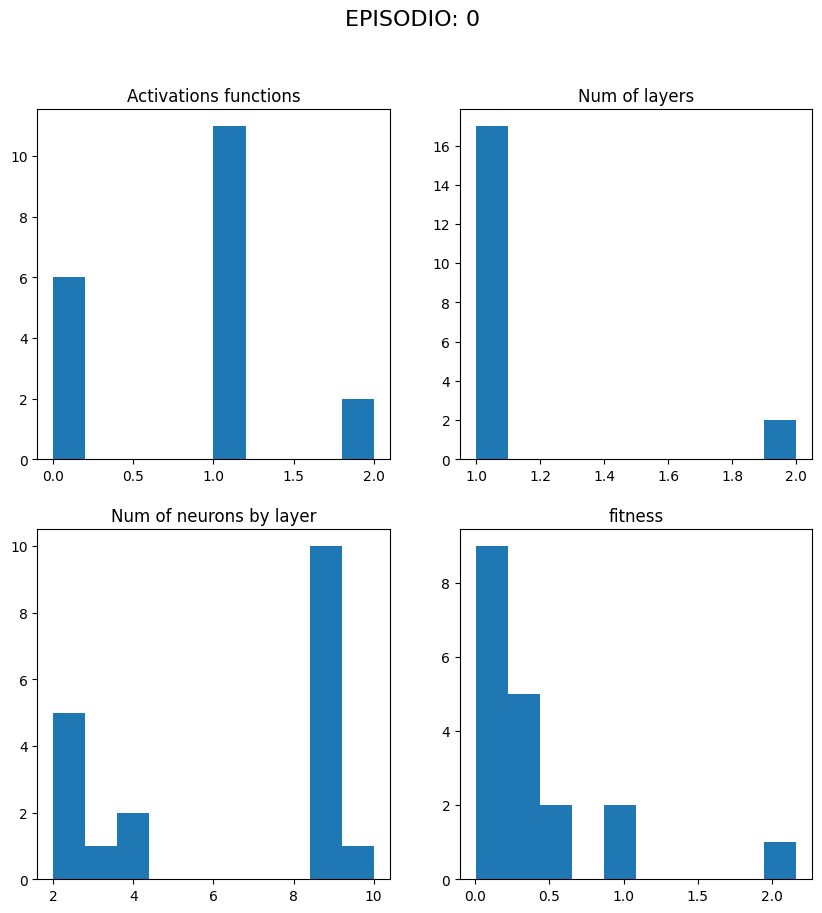

1
El tiempo de ejecución fue: 48.022935340000004 segundos


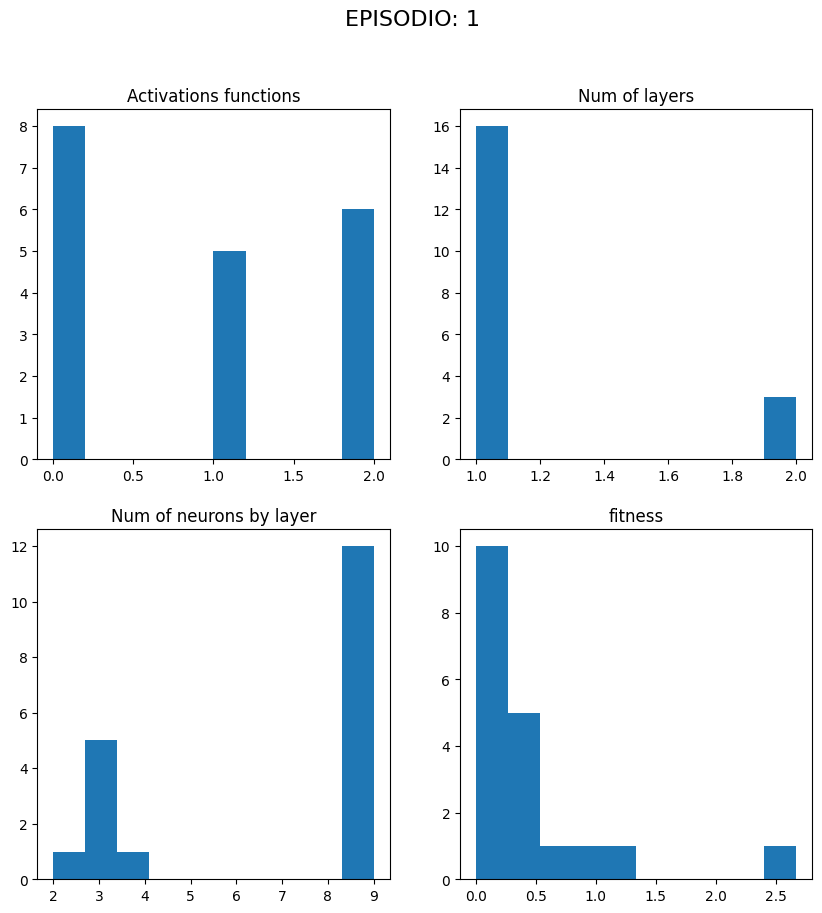

2
El tiempo de ejecución fue: 48.165151759999844 segundos


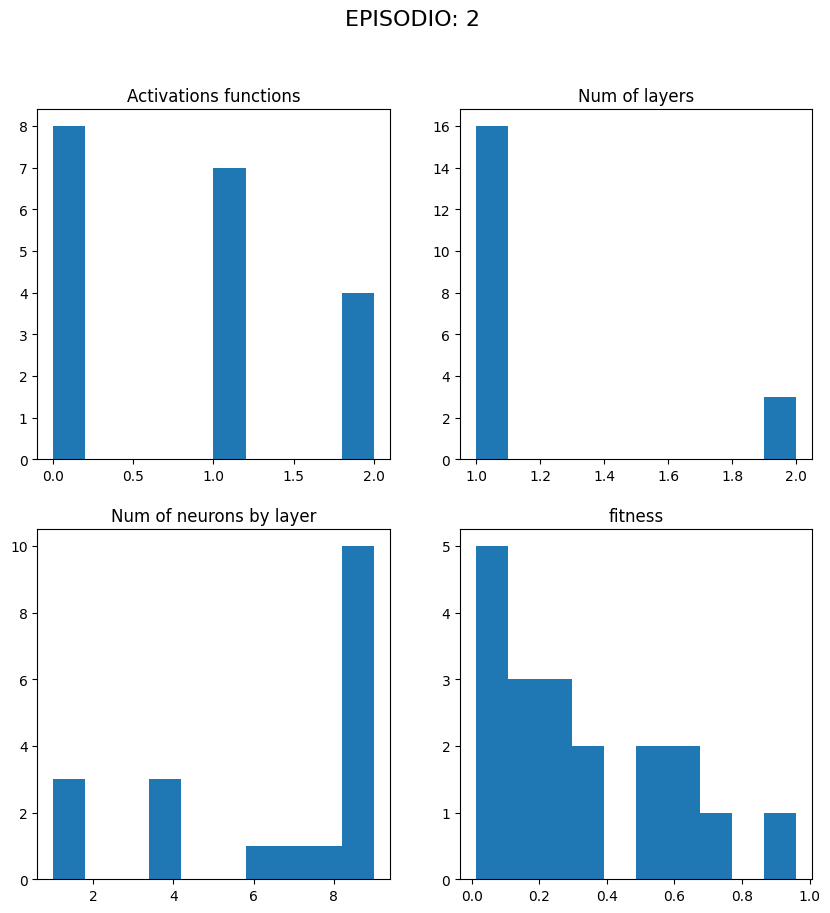

In [21]:
n_episodios = 3


fitness_evo = []

for i in range(n_episodios):
    print(i)
    start_time = timeit.default_timer()
    # ENTRENAMOS N GENERACIONES
    best_solution = ga.run()

    fitness_evo.append(ga.fitness.min())

    end_time = timeit.default_timer()
    execution_time = end_time - start_time
    print(f"El tiempo de ejecución fue: {execution_time} segundos")

    fig , axs = plt.subplots(2,2, figsize=(10,10))

    axs[0,0].hist(ga.population[:,0])
    axs[0,0].set_title('Activations functions')

    axs[0,1].hist(ga.population[:,1])
    axs[0,1].set_title('Num of layers')

    axs[1,0].hist(ga.population[:,2])
    axs[1,0].set_title('Num of neurons by layer')

    axs[1,1].hist(ga.fitness)
    axs[1,1].set_title('fitness')

    fig.suptitle('EPISODIO: ' + str(i), fontsize=16)


    plt.show()


plt.plot(fitness_evo)



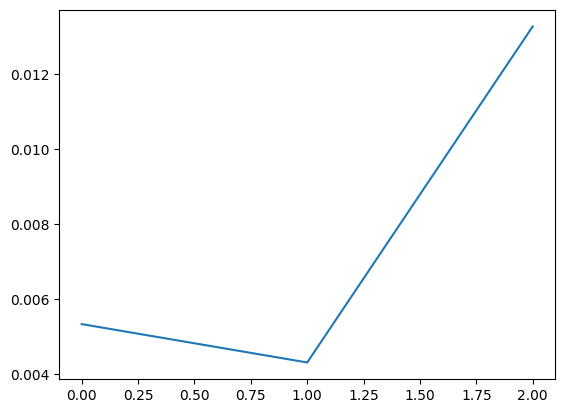